# Part I - (Ford GoBike Data System)
## by (Daniel Obioha)

## Preliminary Wrangling

### Introduction
>  This dataset is centred on a bike system created by Ford in collaboration with Motivate,the global leader of bike-share technology is launched Ford GoBike which is  a regional bike-share network designed to improve and provide stable transportation in the San Francisco Bay Area.



In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


### >Gathering&Assesing

In [2]:
df=pd.read_csv('fordgobike-tripdata.csv')

In [3]:
df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
df.shape

(183412, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [7]:
df.duplicated().sum()

0

#### - Gathering&Assessing insight
> The dataset df consist of 183,412 rows and 16 columns .The dataset is not a clean one as it possesses a number of dirty and untidy data .

### >Cleaning 

In [8]:
# Making a copy of the original dataset 
data=df.copy()

##### . Filling Missing values 

In [9]:
data['start_station_id'].fillna(data['start_station_id'].mode()[0],inplace=True)
data['start_station_id'].isnull().sum()

0

In [10]:
data['start_station_name'].fillna(data['start_station_name'].mode()[0],inplace=True)
data['start_station_name'].isnull().sum()

0

In [11]:
data['end_station_id'].fillna(data['end_station_id'].mode()[0],inplace=True)
data['end_station_id'].isnull().sum()

0

In [12]:
data['end_station_name'].fillna(data['end_station_name'].mode()[0],inplace=True)
data['end_station_name'].isnull().sum()

0

In [13]:
data['member_birth_year'].fillna(data['member_birth_year'].mean(),inplace=True)
data['member_birth_year'].isnull().sum()

0

In [14]:
data['member_gender'].fillna(data['member_gender'].mode()[0],inplace=True)
data['member_gender'].isnull().sum()

0

In [15]:
data.isnull().sum().sum()

0

##### .Conversion

In [16]:
#Converting Data types 
# Converting Column datatypes from float64 to object(str)
data=data.astype({'start_station_id':'object','end_station_id':'object','bike_id':'object'})

#Converting datetime columns from object(str) to datetime  
data['end_time']=pd.to_datetime(data['end_time'])
data['start_time']=pd.to_datetime(data['start_time'])
# Converting column from float64 to int
data['member_birth_year']=data['member_birth_year'].astype(int)

#converting column datatype  to categorical datatype 
data[['user_type', 'member_gender']] = data[['user_type', 'member_gender']].astype('category')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  object        
 4   start_station_name       183412 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183412 non-null  object        
 8   end_station_name         183412 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

### >Feature Engineering

In [18]:
# Creating a column for the users age 
age=[]
for i in data['member_birth_year']:
    age.extend([i])

data['age']=age
cal=2019
data['age']=cal-data['age']

In [19]:
# Creating columns; day and hour 
data['start_day']=data['start_time'].dt.day_name()
data['end_day']=data['end_time'].dt.day_name()
data['start_hour'] = data['start_time'].dt.hour
data['end_hour'] = data['end_time'].dt.hour

In [20]:
# Creating column duration in minutes
data['duration_min'] = data['duration_sec'] / 60

In [21]:
data.sample()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,start_day,end_day,start_hour,end_hour,duration_min
104649,194,2019-02-14 08:22:49.612,2019-02-14 08:26:04.125,251.0,California St at University Ave,37.870555,-122.27972,238.0,MLK Jr Way at University Ave,37.871719,...,Subscriber,1971,Female,No,48,Thursday,Thursday,8,8,3.233333


In [22]:
data.shape

(183412, 22)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  object        
 4   start_station_name       183412 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183412 non-null  object        
 8   end_station_name         183412 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

### > Storing Master Dataset  

In [24]:
data.to_csv('fordgobike_master_dataset.csv', index=False)

### What is the structure of your dataset?

> My master dataset has a total of 22 columns and 183,412 rows

### What is/are the main feature(s) of interest in your dataset?

> My main focus is on the duration_min feature as i am trying to figure out what factor  influences how long a bike ias rented for.
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I suspect that the days of week and the hours of day  will have effect on the duration of trip. I also think that the user info  will also be helpful.

## Univariate Exploration

### - Categorical columns

### What Gender has the highest bike usage ?
- Member_gender

In [80]:
def CountPlot(data,X,color=None,order=None):
    # I created this function(Countplot) for easy plotting and visualising of the frequency of the datasets varaibles
    
    
    # setting plot dimension
    plt.figure(figsize=[15,13])
    #setting plot
    sns.countplot(data=data,x=X,edgecolor='black',color=color,order=order);
    # Cleaning up varaible names after plotting by replacing '_' with a white space " "
    X=X.replace('_'," ")
    # Adding title
    plt.title(f' Distribution of {X}'.title(),fontsize=14,fontweight='bold')
    # Adding and formatting x label
    plt.xlabel(X.title(),fontsize=10,fontweight='bold')
    # Adding and formatting y label
    plt.ylabel('Frequency'.title(),fontsize=10,fontweight='bold')

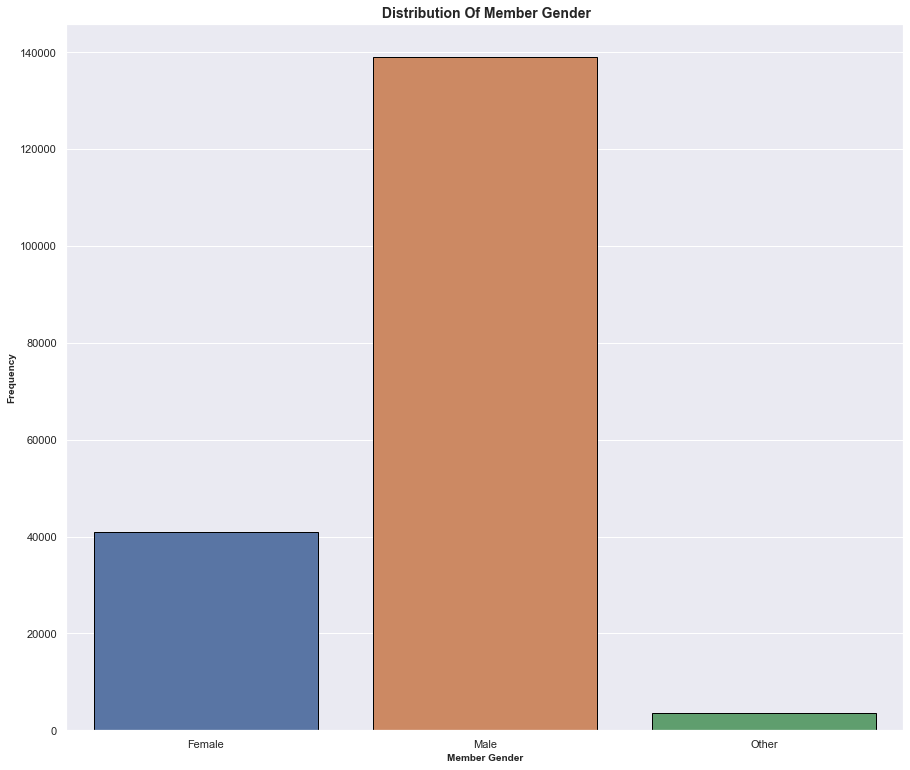

In [81]:
CountPlot(data,'member_gender')

In [26]:
data['member_gender'].value_counts()

Male      138916
Female     40844
Other       3652
Name: member_gender, dtype: int64

### What User_type has the highest bike usage ?
- User_type

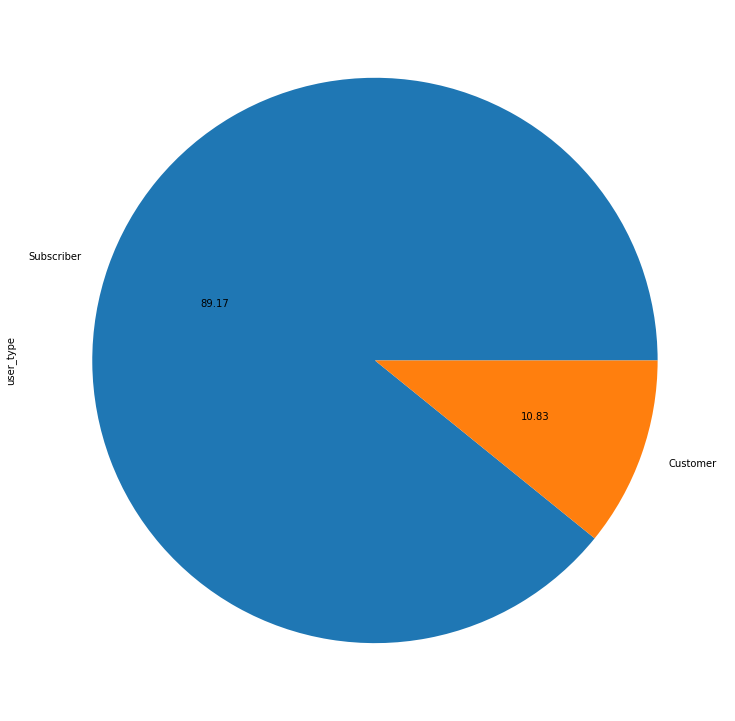

In [27]:
plt.figure(figsize=[15,13])
data['user_type'].value_counts().plot(kind='pie',autopct='%.2f')
plt.show()

In [28]:
data['user_type'].value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

### What is the ratio of bike sharing  ? 
- bike_share_for_all_trip

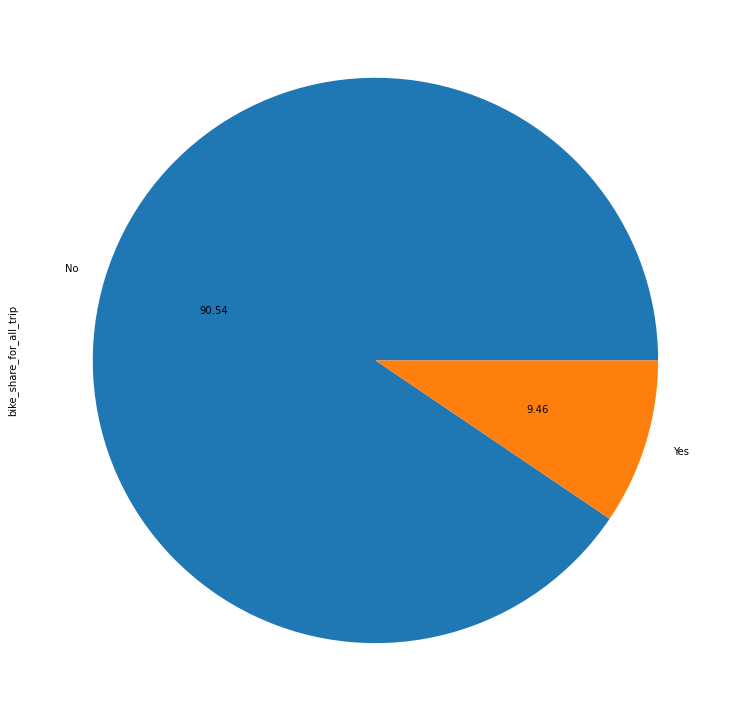

In [29]:
plt.figure(figsize=[15,13])
data['bike_share_for_all_trip'].value_counts().plot(kind='pie',autopct='%.2f')
plt.show()

In [30]:
data['bike_share_for_all_trip'].value_counts()

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

### When are most trips taken on weekdays?

- start_day

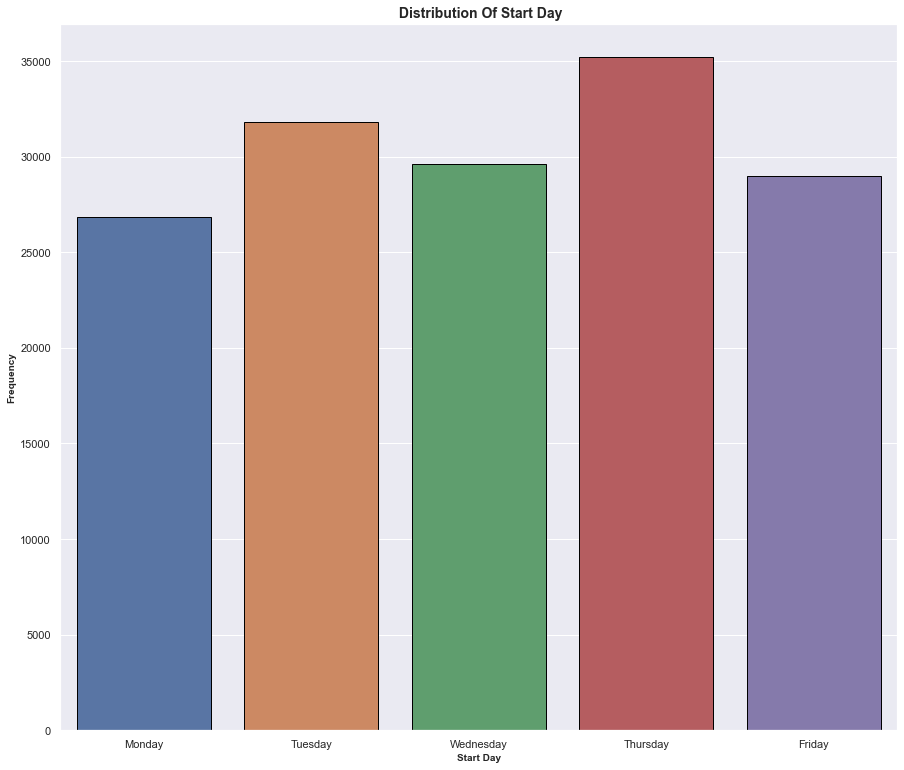

In [82]:
day_order=['Monday','Tuesday','Wednesday','Thursday','Friday']

CountPlot(data,'start_day',order=day_order)

In [32]:
data['start_day'].value_counts()

Thursday     35197
Tuesday      31813
Wednesday    29641
Friday       28981
Monday       26852
Sunday       15523
Saturday     15405
Name: start_day, dtype: int64

- end_day

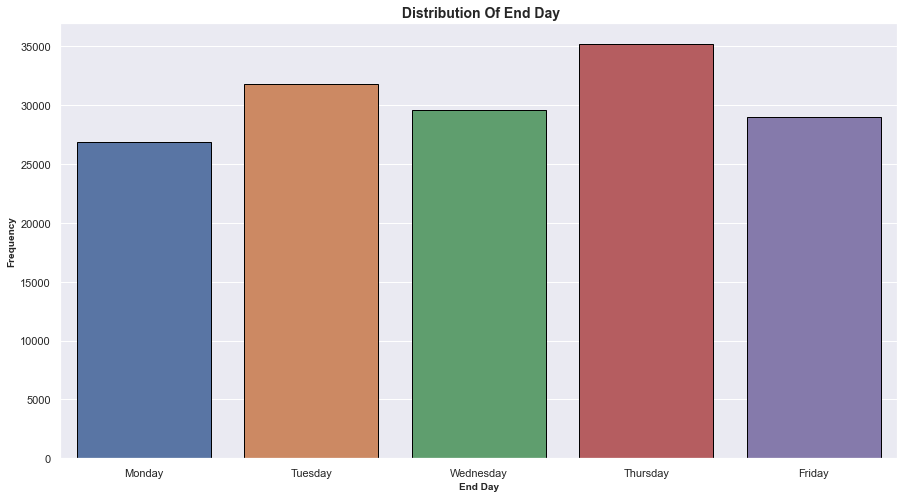

In [78]:
CountPlot(data,'end_day',order=day_order)

In [34]:
data['end_day'].value_counts()

Thursday     35185
Tuesday      31820
Wednesday    29631
Friday       28981
Monday       26859
Sunday       15523
Saturday     15413
Name: end_day, dtype: int64

### - Numerical columns

## What Age occured the most among in the dataset?

- age

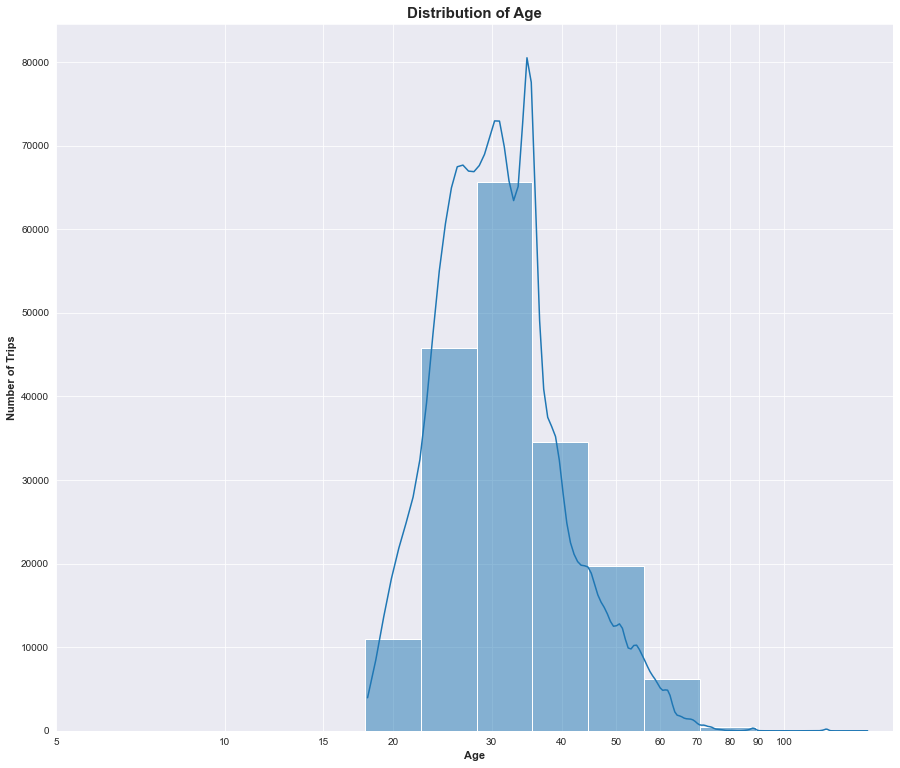

In [35]:
sns.set_style('darkgrid')
plt.figure(figsize=[15,13])
bins = 10 ** np.arange(1.25, np.log10(data.age.max())+0.1, 0.1)
ticks = [5,10,15,20,30,40,50, 60,70,80,90,100]
labels = ['{}'.format(v) for v in ticks]
sns.histplot(data= data, x= 'age', bins=bins, kde=True)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.title('Distribution of Age', fontsize=15, fontweight='bold')
plt.xlabel('Age', fontsize=11, fontweight='bold')
plt.ylabel('Age count',fontsize=11, fontweight='bold');

- From the visualsation we can see that most of the users were people between ages 30-40 and we have a fair nuber of older ones using the bikes probably for exercising purpose.

- start_hour

### What is the count for every hour that people tend to start their trip and end their trip ? Is there a  significant difference between each hour in the start and end hours?

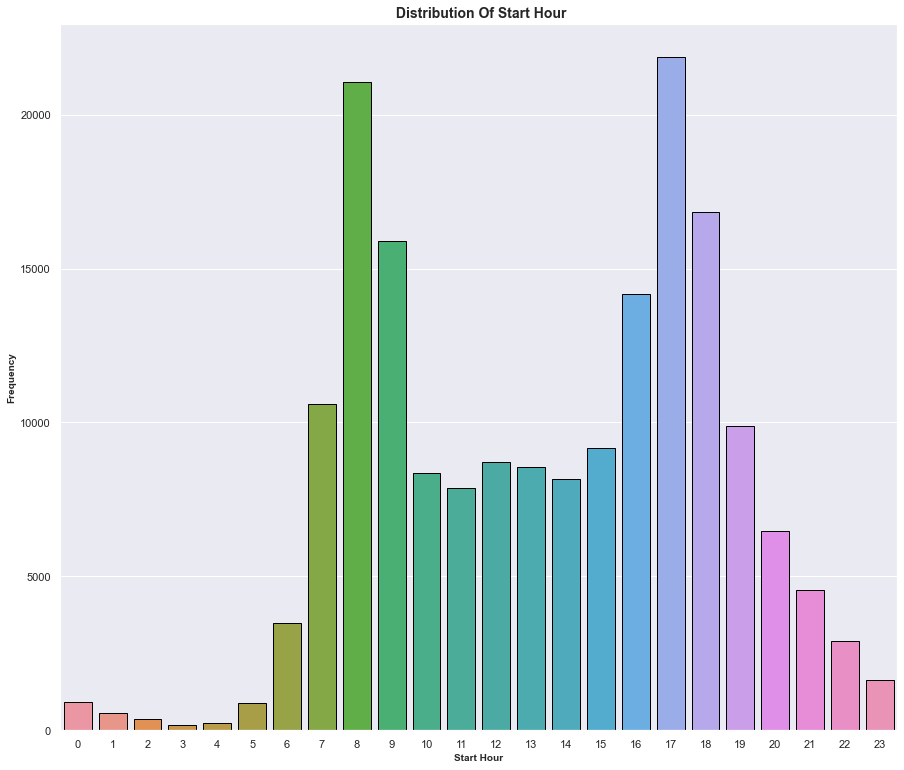

In [83]:
CountPlot(data,'start_hour')

In [37]:
data['start_hour'].value_counts()

17    21864
8     21056
18    16827
9     15903
16    14169
7     10614
19     9881
15     9174
12     8724
13     8551
10     8364
14     8152
11     7884
20     6482
21     4561
6      3485
22     2916
23     1646
0       925
5       896
1       548
2       381
4       235
3       174
Name: start_hour, dtype: int64

- end_hour

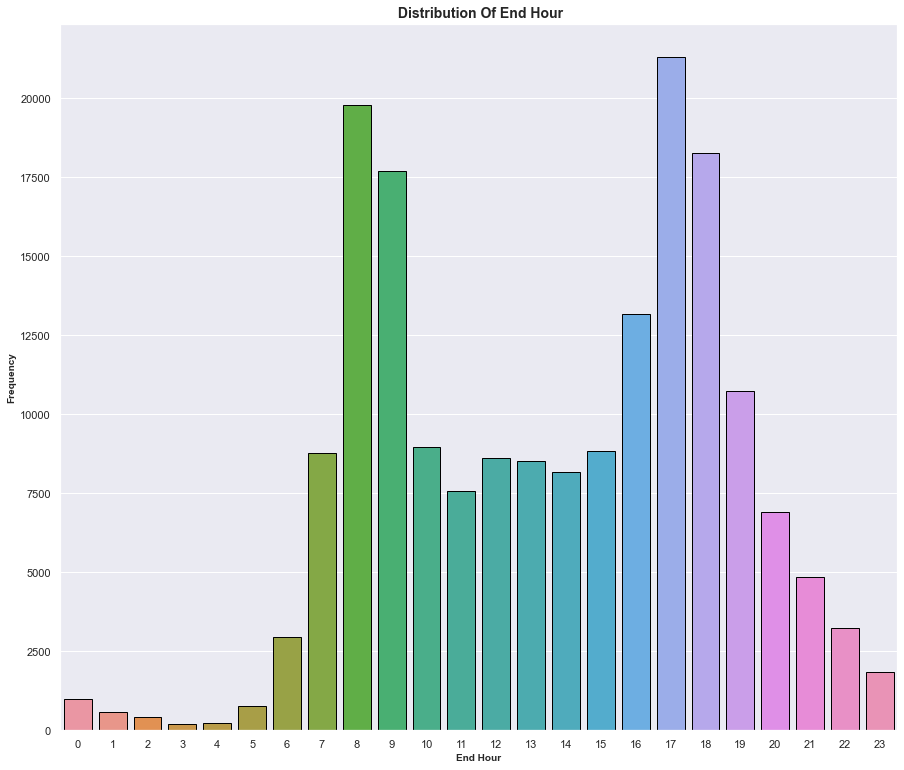

In [85]:
CountPlot(data,'end_hour')

In [39]:
data['end_hour'].value_counts()

17    21295
8     19782
18    18264
9     17684
16    13179
19    10730
10     8977
15     8835
7      8779
12     8617
13     8522
14     8157
11     7587
20     6922
21     4866
22     3240
6      2967
23     1834
0      1003
5       759
1       566
2       422
4       236
3       189
Name: end_hour, dtype: int64

> The 17th and 8th hour have the highest bike rentals .

>Looking visually there isn't any difference between the start and end hours but assesing it programmatically the difference between the hours are not that significant .For example, the 10th start hour has 8,364 bike rentals in that hour and the 10th end hour has 8977 bike rentals .

### What is the count for each duration in minutes in this dataset ?

- duration_min

In [40]:
# changing the datatype of duration_min from float64 to int
data['duration_min']=data['duration_min'].astype(int)

data['duration_min'].value_counts()

5       15660
4       15230
6       14936
7       14185
8       12972
        ...  
1090        1
291         1
275         1
322         1
299         1
Name: duration_min, Length: 479, dtype: int64

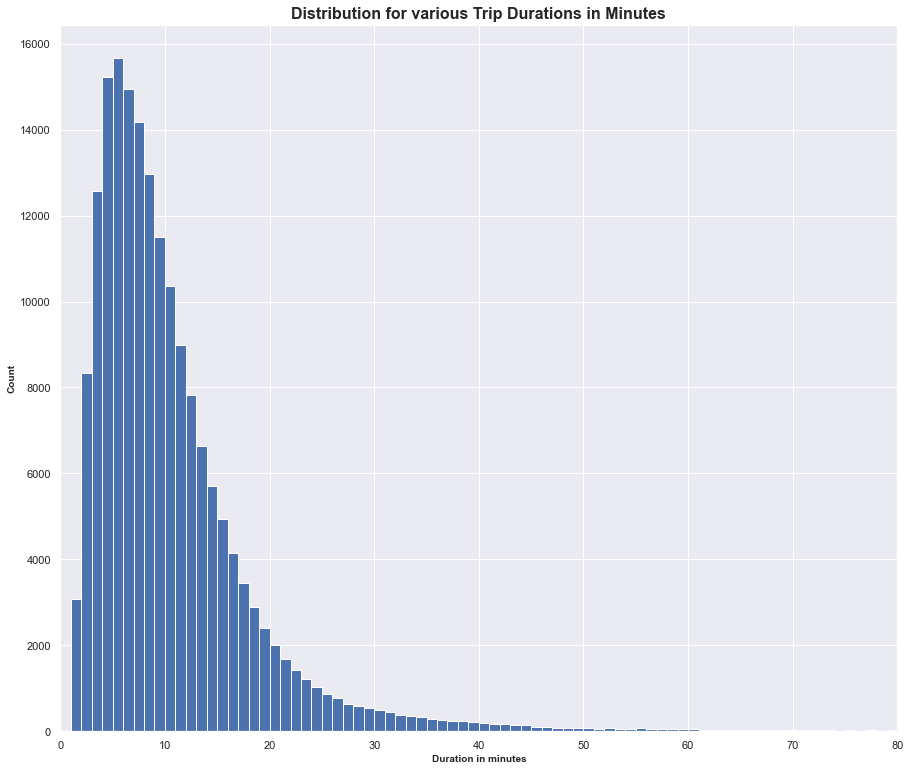

In [41]:
plt.figure(figsize=[15,13])
bins = np.arange(0,data['duration_min'].max() + 1,1)
plt.hist(data['duration_min'],bins=bins)
plt.xlim(0,80)
plt.title("Distribution for various Trip Durations in Minutes",fontweight='bold', fontsize=16)
plt.xlabel('Duration in minutes',fontweight='bold', fontsize=10)
plt.ylabel('Count',fontweight='bold', fontsize=10);

> The most occured trip in the dataset is between 0 - 10 mins 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- Categorical
> -In the member_gender column its seen that they are more males than females which came second and the other gender have the lowest turn out . 

 > -According to the user_type column most rentals were done by subscribers than custmers in the month of Febuary.
 
  > -Comparing the end_day and start_day using visual representation might not be that visible but using prorammatic assessment , its seen that some rentals ovelapsed to the next day .
  
- Numerical 
> For the age column most members that rented in the month of Febuary were around 20-40 years of age .

 > Comparing the end_hour and start_hour , its seen that most rentals ended the same hour and most rentals didn't last up to an hour.
 
  >Most of the trips lasted for about 0-15 min

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I had to change the duration_min data type from float to int inorder to have a more accurate visualisation .

> I created columns from already available columns such as 'age' from 'member_birth_year' e.t.c

> I changed most of the data types of the columns given to ensure accurate analysis .

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [42]:
data.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip', 'age',
       'start_day', 'end_day', 'start_hour', 'end_hour', 'duration_min'],
      dtype='object')

In [43]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
duration_sec,183412.0,726.078435,1794.389780,61.000000,325.000000,514.000000,796.000000,85444.000000
start_station_latitude,183412.0,37.771223,0.099581,37.317298,37.770083,37.780760,37.797280,37.880222
start_station_longitude,183412.0,-122.352664,0.117097,-122.453704,-122.412408,-122.398285,-122.286533,-121.874119
end_station_latitude,183412.0,37.771427,0.099490,37.317298,37.770407,37.781010,37.797320,37.880222
end_station_longitude,183412.0,-122.352250,0.116673,-122.453704,-122.411726,-122.398279,-122.288045,-121.874119
member_birth_year,183412.0,1984.770097,9.887534,1878.000000,1981.000000,1987.000000,1992.000000,2001.000000
age,183412.0,34.229903,9.887534,18.000000,27.000000,32.000000,38.000000,141.000000
start_hour,183412.0,13.458421,4.724978,0.000000,9.000000,14.000000,17.000000,23.000000
end_hour,183412.0,13.614769,4.739638,0.000000,9.000000,14.000000,18.000000,23.000000
duration_min,183412.0,11.609393,29.908067,1.000000,5.000000,8.000000,13.000000,1424.000000


### What is the correlation among the features in the dataset ?

In [44]:
data.corr()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,age,start_hour,end_hour,duration_min
duration_sec,1.000000,0.010513,-0.037930,0.010873,-0.038906,-0.006336,0.006336,0.006645,0.004388,0.999954
start_station_latitude,0.010513,1.000000,-0.677227,0.989969,-0.682637,-0.075515,0.075515,-0.017101,-0.016514,0.010525
start_station_longitude,-0.037930,-0.677227,1.000000,-0.681815,0.992410,0.125034,-0.125034,0.053245,0.049736,-0.037947
end_station_latitude,0.010873,0.989969,-0.681815,1.000000,-0.684197,-0.075623,0.075623,-0.033929,-0.033072,0.010886
end_station_longitude,-0.038906,-0.682637,0.992410,-0.684197,1.000000,0.125859,-0.125859,0.033620,0.030163,-0.038928
member_birth_year,-0.006336,-0.075515,0.125034,-0.075623,0.125859,1.000000,-1.000000,0.062696,0.060849,-0.006365
age,0.006336,0.075515,-0.125034,0.075623,-0.125859,-1.000000,1.000000,-0.062696,-0.060849,0.006365
start_hour,0.006645,-0.017101,0.053245,-0.033929,0.033620,0.062696,-0.062696,1.000000,0.981298,0.006615
end_hour,0.004388,-0.016514,0.049736,-0.033072,0.030163,0.060849,-0.060849,0.981298,1.000000,0.004357
duration_min,0.999954,0.010525,-0.037947,0.010886,-0.038928,-0.006365,0.006365,0.006615,0.004357,1.000000


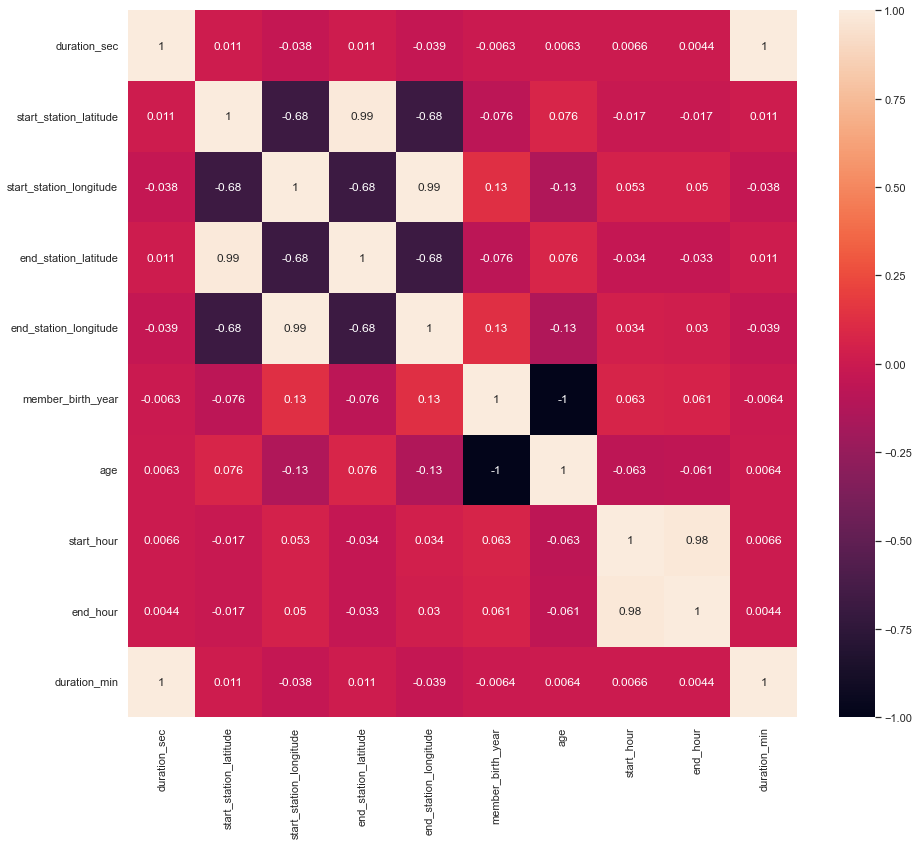

In [45]:
#Visual representation of the datas correlation.
plt.figure(figsize=(15,13))
sns.heatmap(data.corr(), annot=True);

### What is the variation of User_type in Gender ?

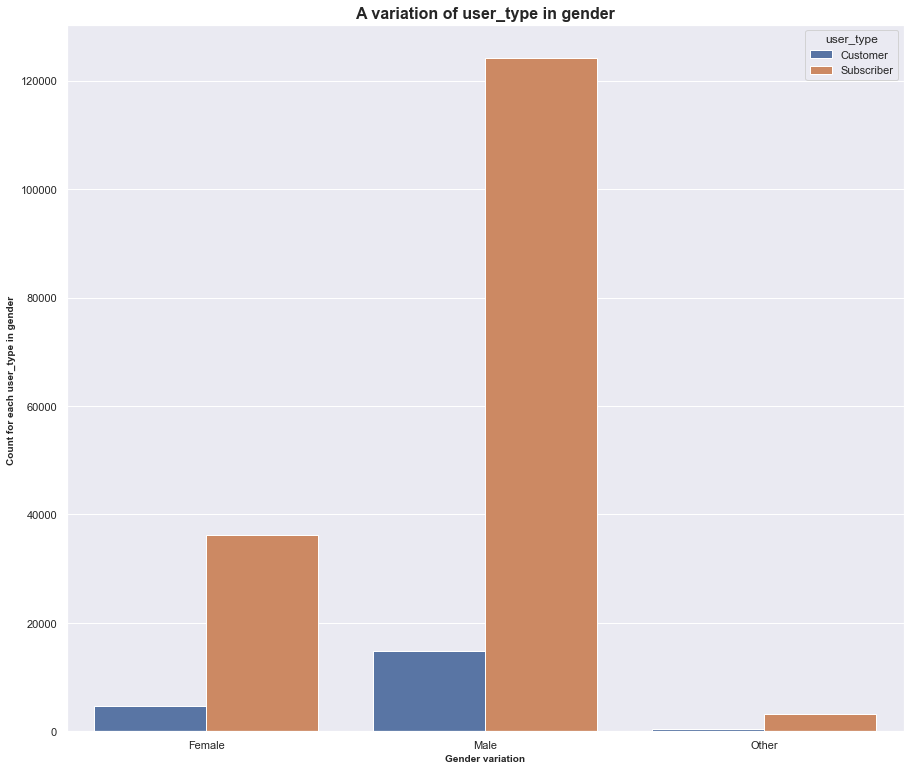

In [46]:
plt.figure(figsize=[15,13])
sns.countplot(x='member_gender',hue='user_type',data=data)
plt.xlabel('Gender variation', fontweight='bold', fontsize=10)
plt.ylabel('Count for each user_type in gender ', fontsize=10, fontweight='bold')
plt.title('A variation of user_type in gender', fontsize=16, fontweight='bold');

  - The Male Subscriber are  more than female, and also the male Customer more than the Female.

###  At what hour do the users use the bike?

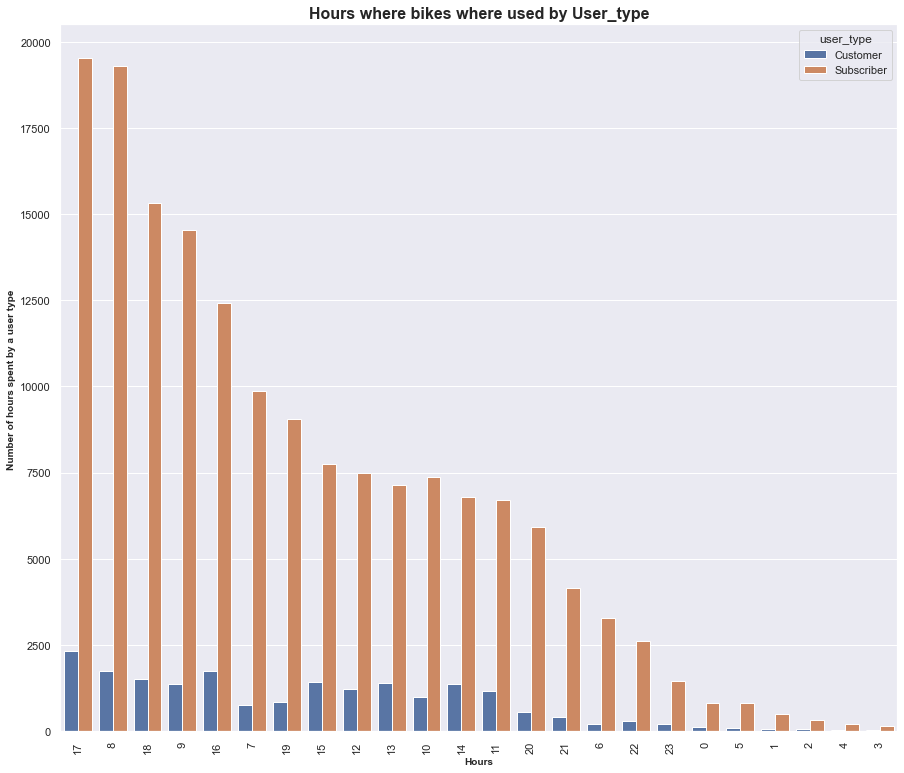

In [47]:
plt.figure(figsize=[15,13])
sns.countplot(data=data,x='start_hour',hue='user_type',order=data['start_hour'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Hours where bikes where used by User_type',fontsize=16,fontweight='bold')
plt.xlabel('Hours',fontsize=10,fontweight='bold')
plt.ylabel('Number of hours spent by a user type ',fontsize=10,fontweight='bold');


- Customers hours of riding bicycles are spread out between the 8th -17th hour of the day .
- Subscribers have a tremendous use of the the bicycle during the 17th and 8th hour of the day .
>  The analysis of visualisations is probably due to the opening and closing hours of work hours.

### What number of users engaged in bike sharing ?

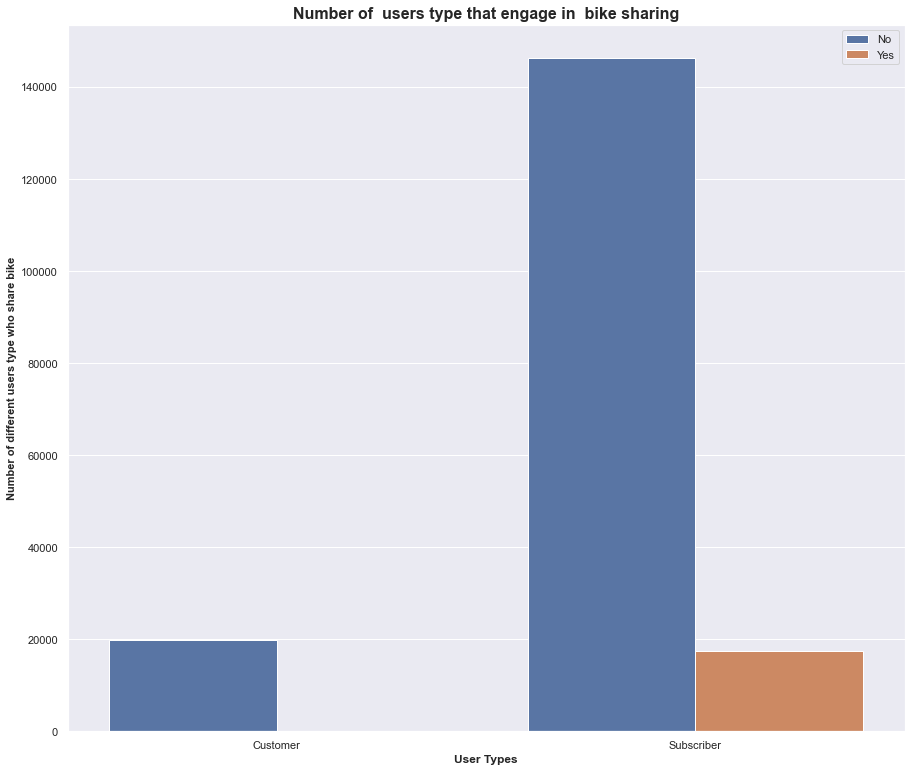

In [48]:
plt.figure(figsize=[15,13])
sns.countplot(data=data,x='user_type',hue='bike_share_for_all_trip')
plt.title('Number of  users type that engage in  bike sharing',fontweight='bold',fontsize=16)
plt.xlabel('User Types',fontweight='bold')
plt.ylabel('Number of different users type who share bike',fontweight='bold',fontsize=11)
plt.legend(loc=1);


- No customer engages in bike sharing but as for subscribers only a few of hem engaged in bike sharing 

### What is the variation of the Genders age ?

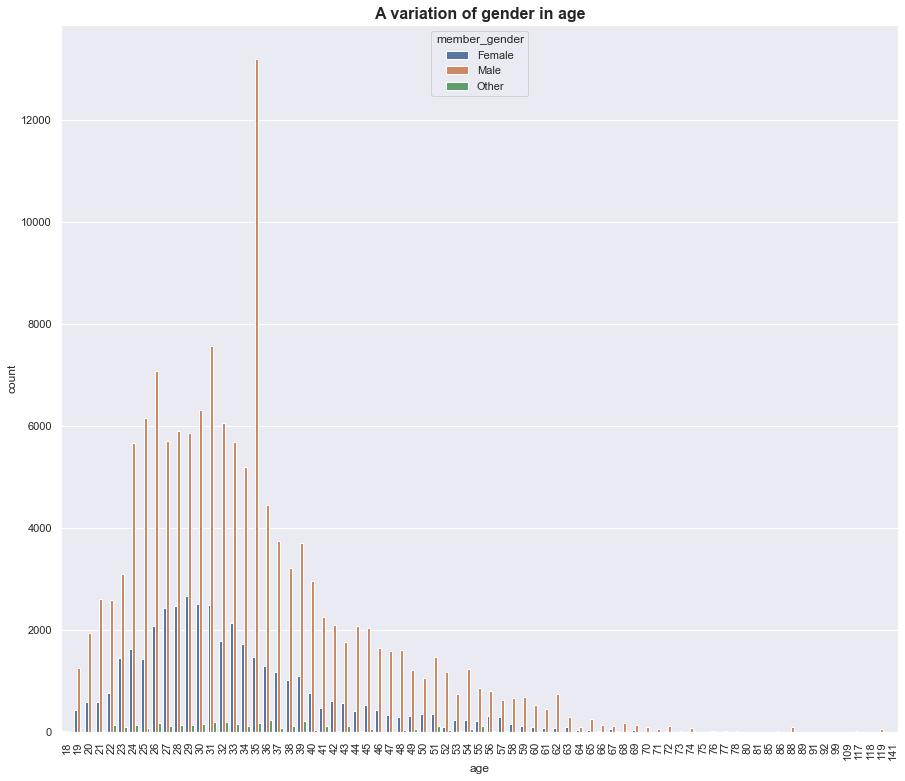

In [49]:
plt.figure(figsize=(15,13))
plt.xticks(rotation=90)
plt.title("A variation of gender in age",fontweight='bold',fontsize=16)
ax=sns.countplot(x=data.age,hue=data.member_gender);

## What is the variation of the User types age  ?

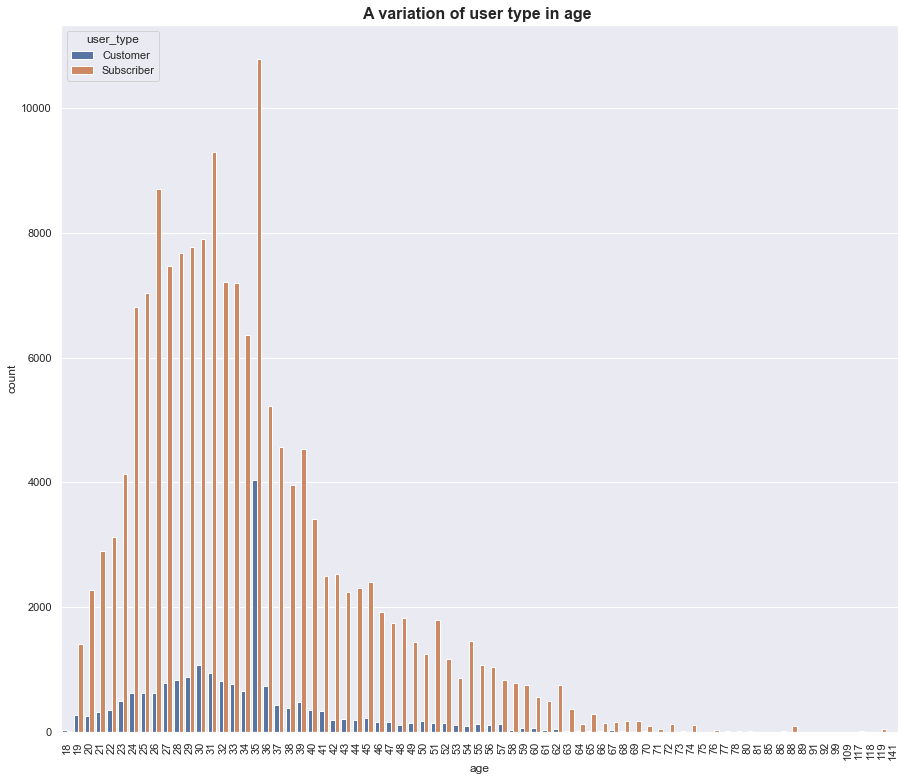

In [50]:
plt.figure(figsize=(15,13))
plt.xticks(rotation=90)
plt.title("A variation of user type in age ",fontweight='bold',fontsize=16)
ax=sns.countplot(x=data.age,hue=data.user_type);

- Most customer age are found between 18-40 years of age .Significantly, there are more customers who ages were 35.
- Most subscribers age were between ages 24 - 35 years .

## what is the relationship between  Gender and Trip duration ?

<Figure size 1080x936 with 0 Axes>

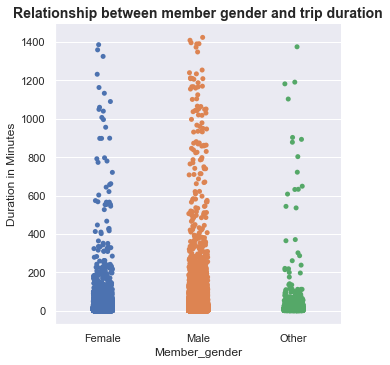

In [51]:
plt.figure(figsize=(15,13))
sns.catplot(x='member_gender',y='duration_min',data=data)
plt.title("Relationship between member gender and trip duration" ,fontsize=14,fontweight='bold')
plt.xlabel('Member_gender')
plt.ylabel('Duration in Minutes');

- They are a lot of outliers and these are  probably trips that are more than 60 minutes.

In [52]:
#setting duration_min less than or equal to 60 minutes to avoid outliers
minutes = data[data['duration_min']<=60]

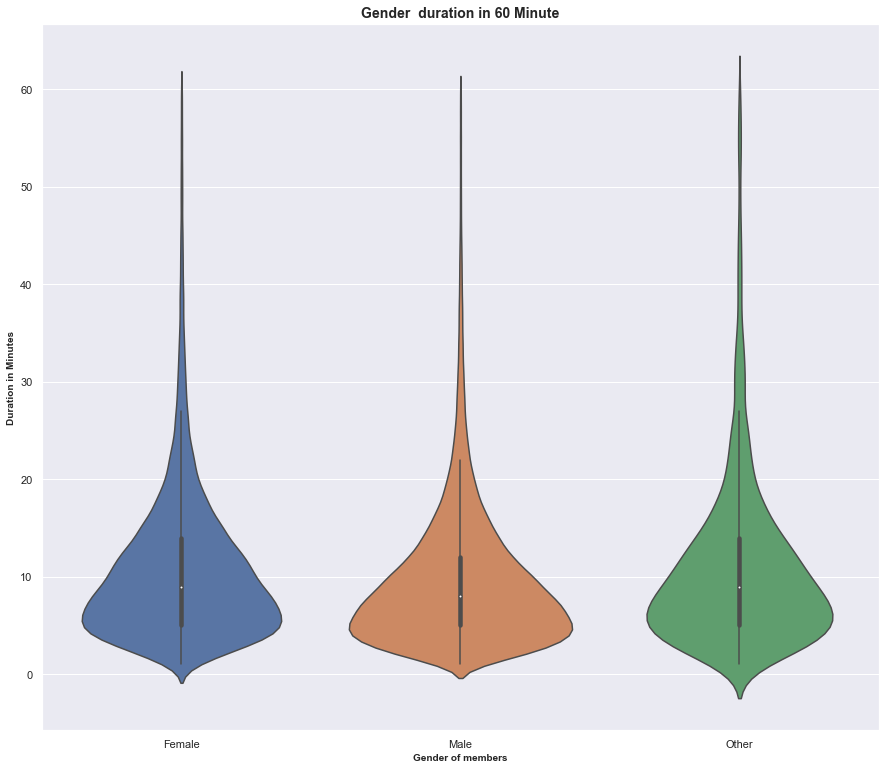

In [53]:
plt.figure(figsize=(15,13))
sns.violinplot(data=minutes, x='member_gender', y='duration_min')
plt.title('Gender  duration in 60 Minute',fontsize=14,fontweight='bold')
plt.xlabel('Gender of members',fontsize=10,fontweight='bold')
plt.ylabel('Duration in Minutes',fontsize=10,fontweight='bold');


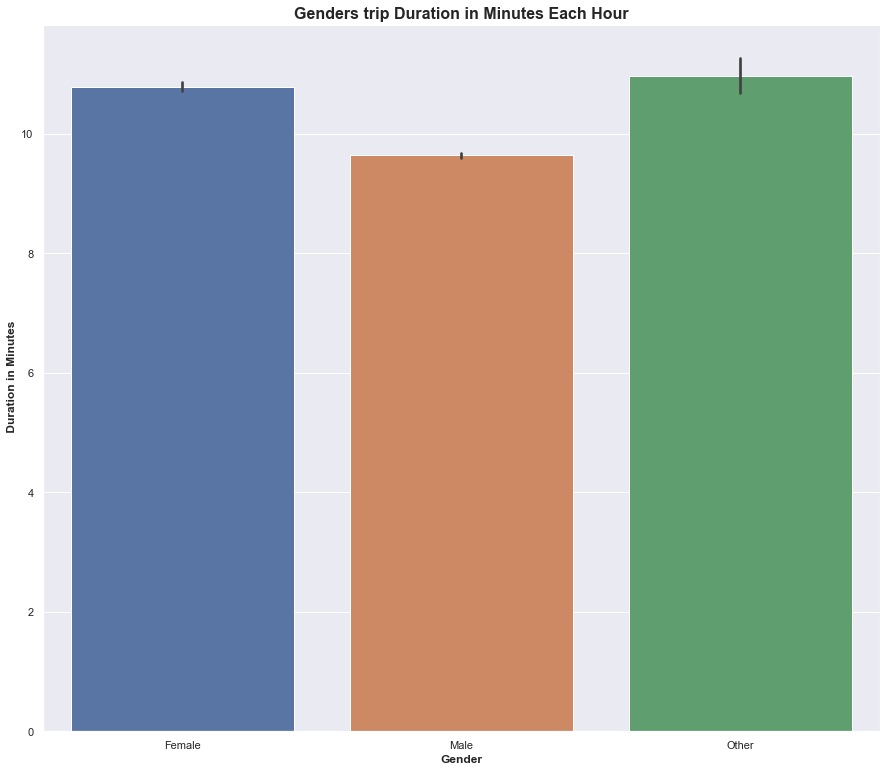

In [54]:
plt.figure(figsize=(15,13))
sns.barplot(data=minutes, x='member_gender', y='duration_min')
plt.xlabel('Gender', fontweight='bold', fontsize=12)
plt.ylabel(' Duration in Minutes', fontsize=12, fontweight='bold')
plt.title('Genders trip Duration in Minutes Each Hour', fontsize=16, fontweight='bold');

- The violin plot doesn't give a clear difference between the genders so I opted for the barplot , which gave a clear representation .
- Customers or subscribers who identified as Other have the highest trip duration in minutes while the Males have the lowest trip duration.

## what is the relationship between User type and Trip duration ?

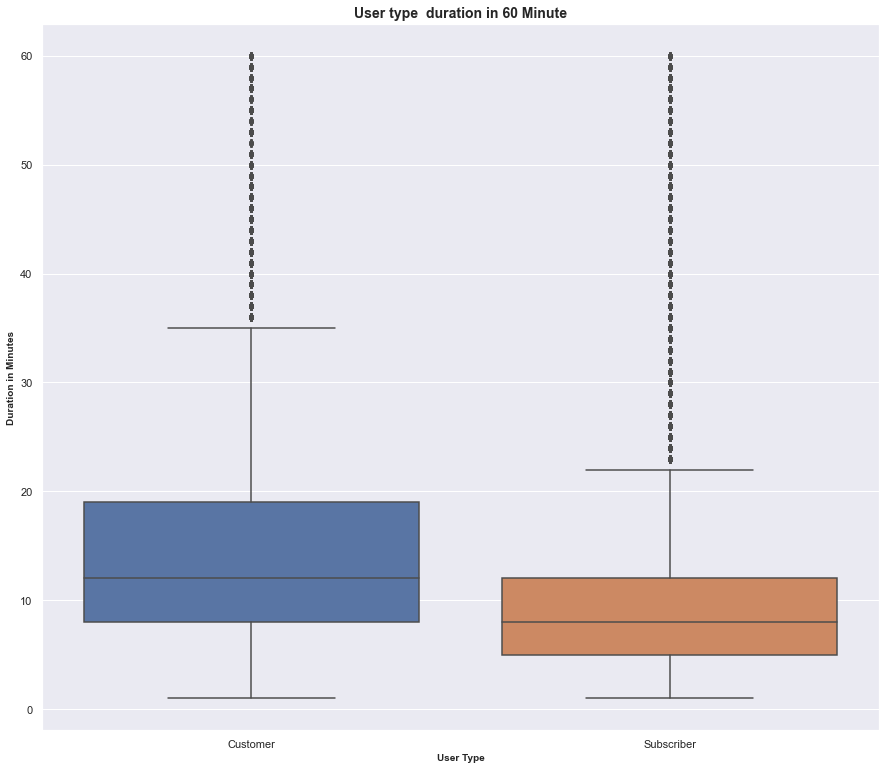

In [55]:
#user_type, member_gender against duration_min using violinplot
plt.figure(figsize=[15,13])
sns.boxplot(data=minutes,x='user_type',y='duration_min')
plt.title('User type  duration in 60 Minute',fontsize=14,fontweight='bold')
plt.xlabel('User Type',fontsize=10,fontweight='bold')
plt.ylabel('Duration in Minutes',fontsize=10,fontweight='bold');

> We can see the average trip duration for customer is higher than subscriber.

>We can also say that subscriber's trip seems to be short at time.

## What is the Avg Trip Duration in Minutes Each Hour ?

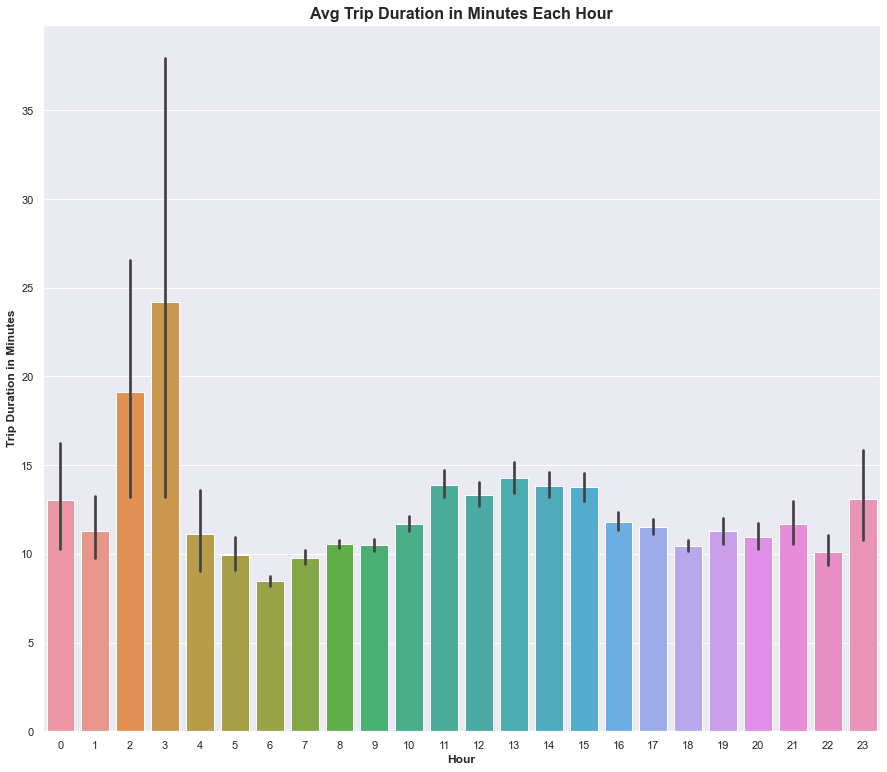

In [56]:
plt.figure(figsize=(15,13))
sns.barplot(data=data, x='start_hour', y='duration_min')
plt.xlabel('Hour', fontweight='bold', fontsize=12)
plt.ylabel('Trip Duration in Minutes', fontsize=12, fontweight='bold')
plt.title('Avg Trip Duration in Minutes Each Hour', fontsize=16, fontweight='bold');

- I observed that most hours of the day have short trips except 2 am and 3 am have long trips.

## What week day has  the day longest trip in minutes ?

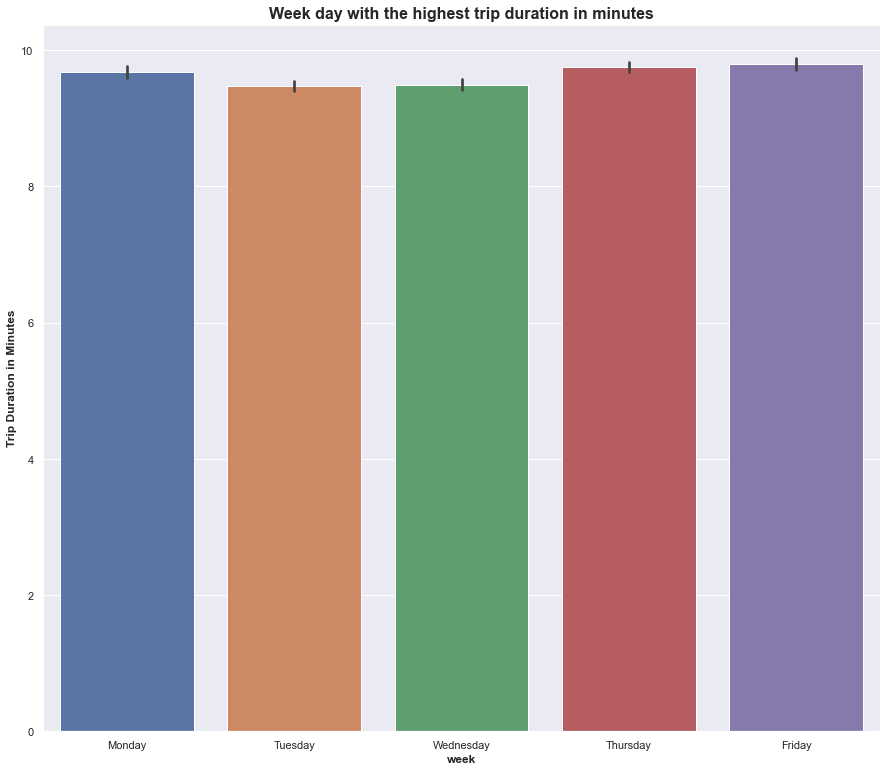

In [65]:
plt.figure(figsize=(15,13))
sns.barplot(data=minutes, x='start_day', y='duration_min',order=day_order)
plt.xlabel('week', fontweight='bold', fontsize=12)
plt.ylabel('Trip Duration in Minutes', fontsize=12, fontweight='bold')
plt.title('Week day with the highest trip duration in minutes', fontsize=16, fontweight='bold');

- The longest trips  took place during the weekend 

## For each day of the week ,what number of user type engage in bike riding?

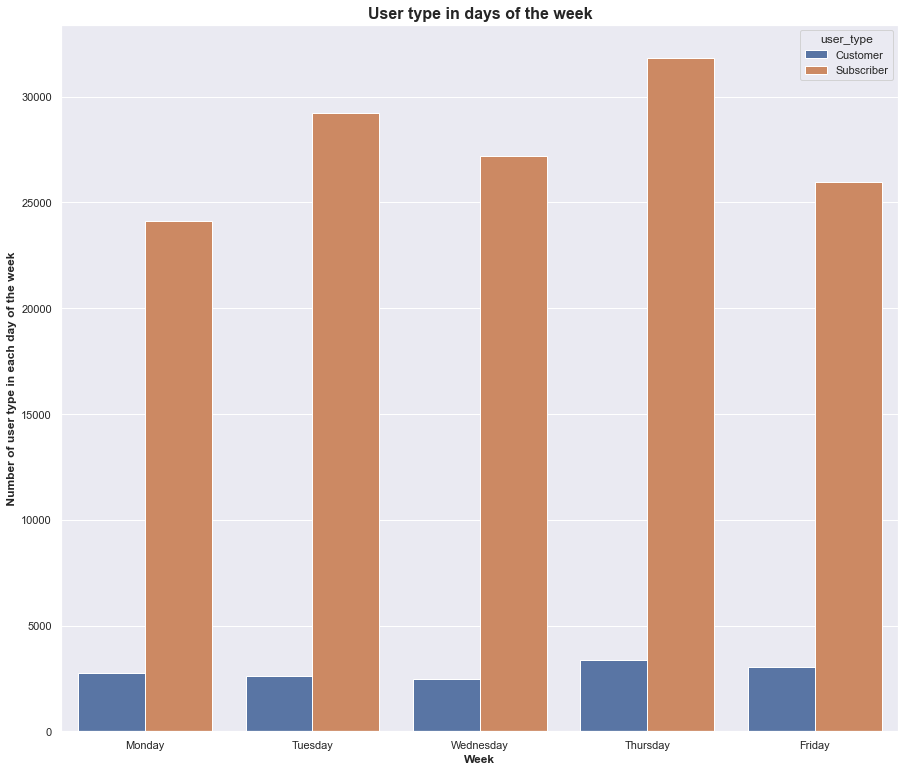

In [66]:
plt.figure(figsize=(15,13))
sns.countplot(data=data, x='start_day', hue='user_type',order=day_order)
plt.xlabel('Week', fontweight='bold', fontsize=12)
plt.ylabel(' Number of user type in each day of the week ', fontsize=12, fontweight='bold')
plt.title('User type in days of the week', fontsize=16, fontweight='bold');

> Thursday has the biggest bike rentals for both Customers and Subscribers 

## For each day of the week how many , what number of the different  Gender engage in bike riding?

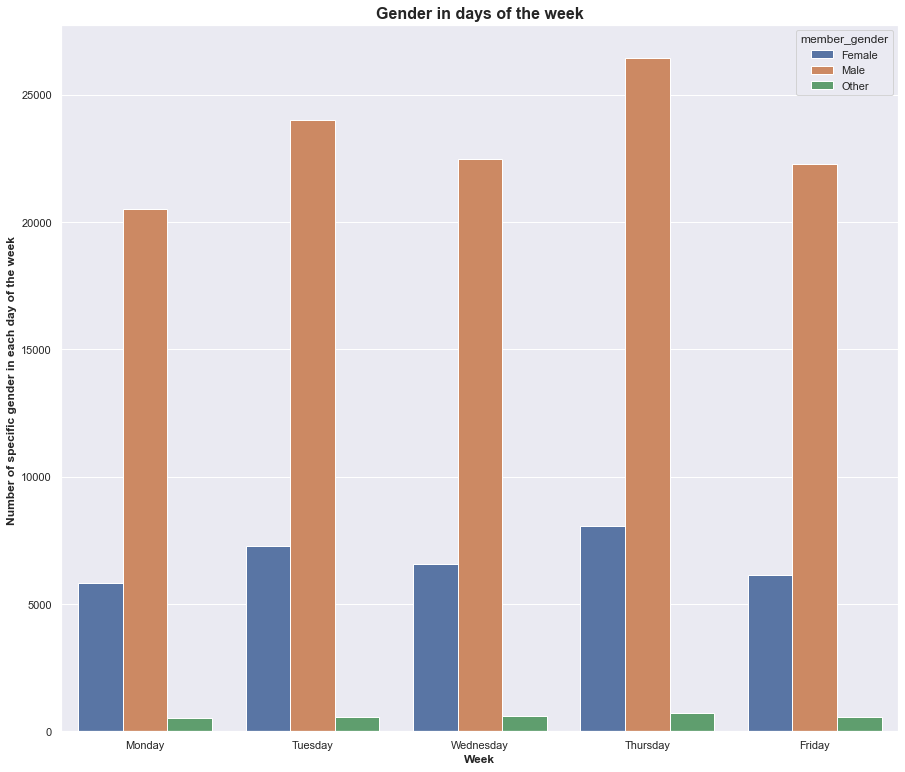

In [67]:
plt.figure(figsize=(15,13))
sns.countplot(data=data, x='start_day', hue='member_gender',order=day_order)
plt.xlabel('Week', fontweight='bold', fontsize=12)
plt.ylabel('Number of specific gender in each day of the week ', fontsize=12, fontweight='bold')
plt.title('Gender in days of the week', fontsize=16, fontweight='bold');

- Male: High turn out on Thursdays ,Tuesday,Fridays ,Wednesday and Thursday .Low turn out on weekends.
- Female: High turn out on Thursdays ,Tuesday,Fridays ,Wednesday and Thursday .Low turn out on weekends.
- Other : High turn out on Thursdays ,Tuesday,Fridays ,Wednesday and Thursday .Low turn out on weekends.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
- There was much more subscribers usage than customers in general. 
- All week days have short trips, except weekend (saturday and sunday) has long trips.
- The Customers engage in  longer trips more, while the Subscribers engage in  more.
- It seems that male and female members with same trip duration, no big difference between them.
- The relation between age and trip duration is negative as expected, as when the age increases, the duration of the trips decreases
- Most hours of the day have short trips except 2 am and 3 am have long trips.
- Age is positively correlateted with long trips , which means that the younger the person the longer the trips .
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
- There was much more subscribers usage than customers in general. 
-  With both the user_type and member_gender column I have been able to deduce that on weeekends they are less usage of the bikes on the these days .
- The Male Subscriber more than female, and also the male Customer more than the Female.


## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

## what is the relation between Days of week, duration in minutes and Member gender on Trip duration ?

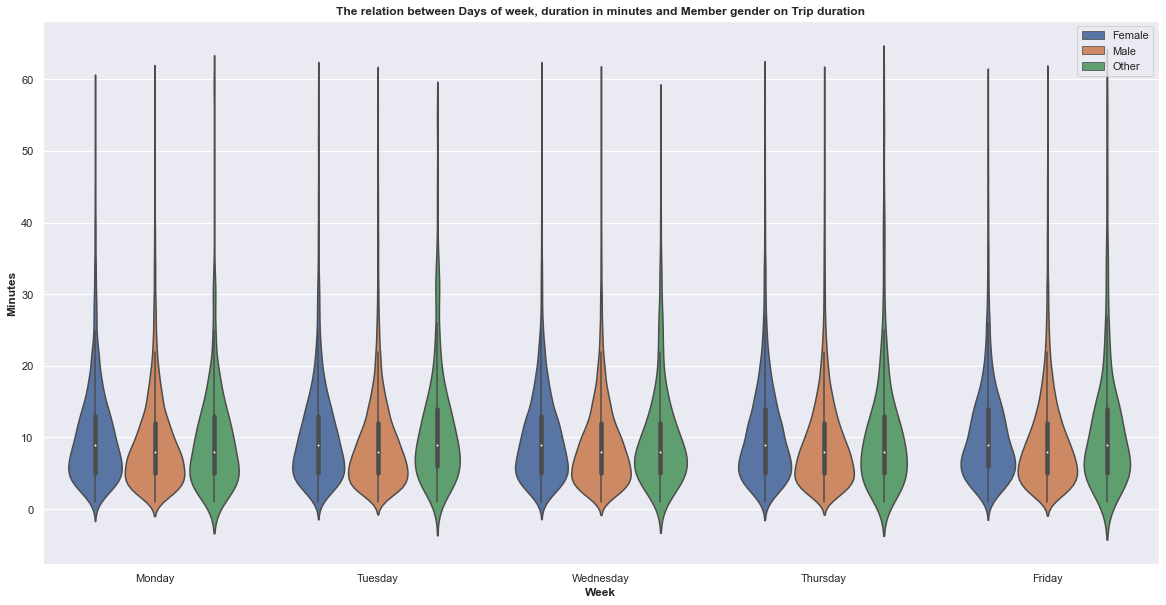

In [68]:
plt.figure(figsize=[20,10])
sns.violinplot(data=minutes,x='start_day',y='duration_min',hue='member_gender',order=day_order)
plt.legend(loc=1)
plt.title('The relation between Days of week, duration in minutes and Member gender on Trip duration',
          fontweight='bold', fontsize=12)
plt.xlabel('Week', fontweight='bold', fontsize=12)
plt.ylabel('Minutes',fontweight='bold', fontsize=12);

## what is the relation between days of week, duration in minutes and user type on Trip duration?

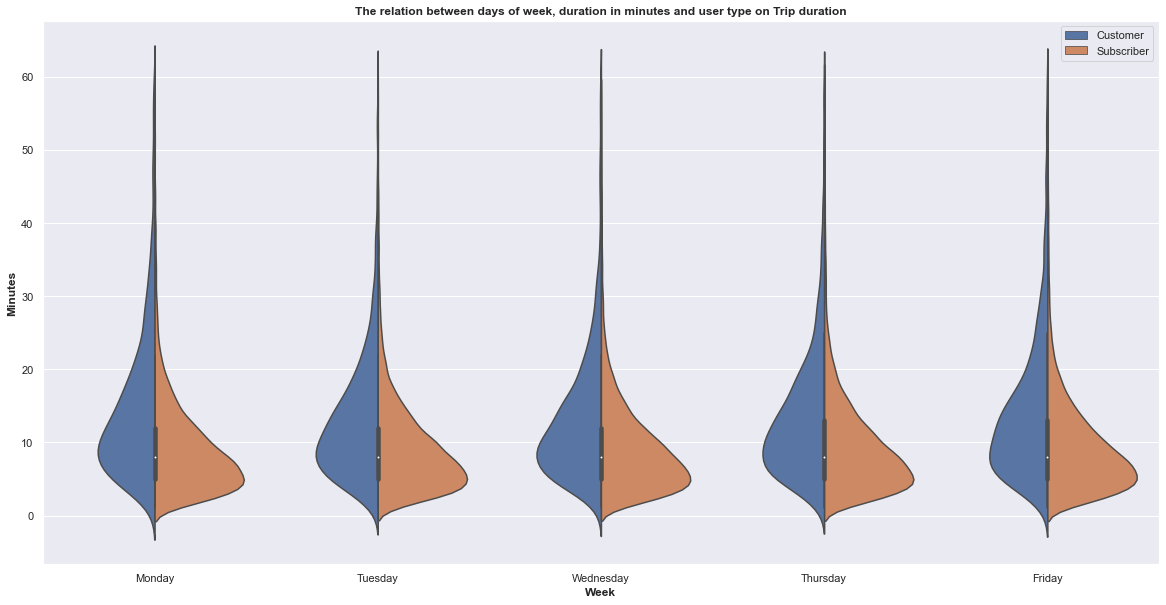

In [69]:
plt.figure(figsize=[20,10])
sns.violinplot(data=minutes,x='start_day',y='duration_min',hue='user_type' ,split=True,order=day_order)
plt.legend(loc=1)
plt.title('The relation between days of week, duration in minutes and user type on Trip duration',
          fontweight='bold', fontsize=12)
plt.xlabel('Week', fontweight='bold', fontsize=12)
plt.ylabel('Minutes',fontweight='bold', fontsize=12);

## What is the relation between user type , duration in minutes and Member gender on Trip duration ?

<Figure size 1440x720 with 0 Axes>

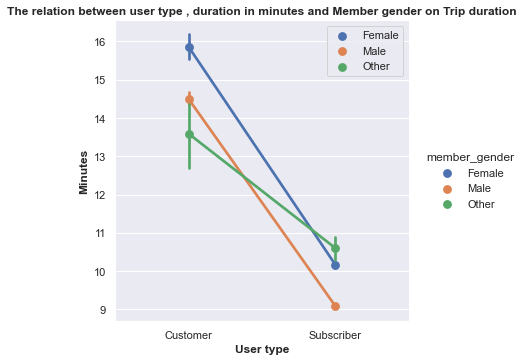

In [62]:
plt.figure(figsize=[20,10])
sns.catplot(x='user_type',y='duration_min',hue="member_gender",kind='point',data=minutes)
plt.legend(loc=1)
plt.title('The relation between user type , duration in minutes and Member gender on Trip duration',
          fontweight='bold', fontsize=12)
plt.xlabel('User type', fontweight='bold', fontsize=12)
plt.ylabel('Minutes',fontweight='bold', fontsize=12);

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

From the above visualisations :
- In the subscribers section , its seen that people who identified as 'other' in the gender section hvae the longest trip and engage in the use of the bikes mostly on weekends.
- In the customer section females have the highest trip duration and engage in rindig bikes mostly on weekends  

### Were there any interesting or surprising interactions between features?

> No , all feature interactions were perfectly normal.

## Conclusions
> The Ford GoBike system at the San Fransisco bay area for the month of Febuary 2019 analysis revealed a lot of intresting facts , one being that although there was a great difference in the number of use between the genders especially the fact that male customers and subscribers superceeded other genders ,they still had the lowest trip duration for both customer and subscriber sections with females having longer trips in the customer section and other for the subscriber section . 


In [71]:
def CountPlot(data,X,color=None,order=None):
    # I created this function(Countplot) for easy plotting and visualising of the frequency of the datasets varaibles
    
    
    # setting plot dimension
    plt.figure(figsize=[15,8])
    #setting plot
    sns.countplot(data=data,x=X,edgecolor='black',color=color,order=order);
    # Cleaning up varaible names after plotting by replacing '_' with a white space " "
    X=X.replace('_'," ")
    # Adding title
    plt.title(f' Distribution of {X}'.title(),fontsize=14,fontweight='bold')
    # Adding and formatting x label
    plt.xlabel(X.title(),fontsize=10,fontweight='bold')
    # Adding and formatting y label
    plt.ylabel('Frequency'.title(),fontsize=10,fontweight='bold')

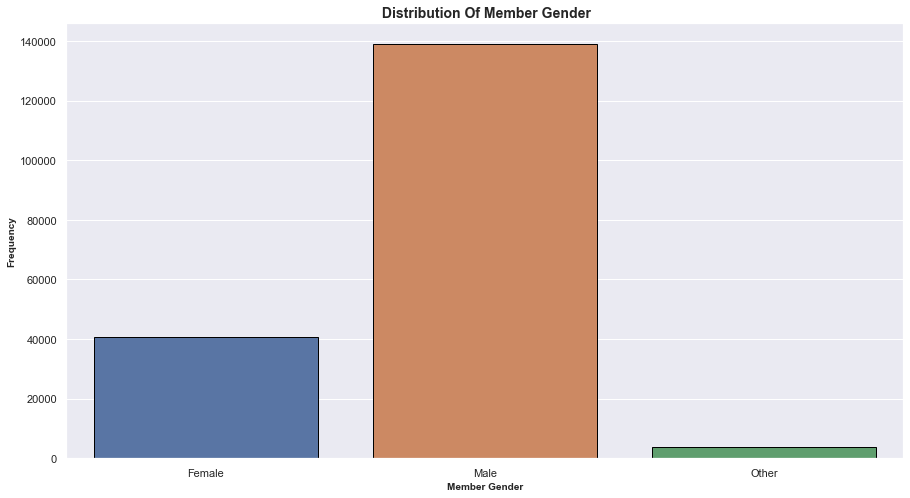

In [73]:
CountPlot(data,'member_gender')